## Importing dependencies

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import warnings
warnings.filterwarnings("ignore")

## Importing dataset

In [32]:
npl_df = pd.read_csv('NPL matches.csv')
npl_final = pd.read_csv('NPL_final.csv')

## Match Data

In [33]:
npl_df.head()

,id,season,date,venue,city,team_1,team_2,toss_winner,toss_decision,result,...,team_1_wickets,team_2_wickets,team_1_runs_from_extra,team_2_runs_from_extra,win_by_runs,win_by_wickets,player_of_the_match,over_balls,extra_balls,total_ball_bowled
0,1,2024,2024-11-30,Tribhuvan University International Cricket Gro...,Kathmandu,Biratnagar Kings,Janakpur Bolts,Janakpur Bolts,field,normal,...,10,2,15,22,0,8,Lahiru Milantha,207,17,224
1,2,2024,2024-12-02,Tribhuvan University International Cricket Gro...,Kathmandu,Kathmandu Gurkhas,Chitwan Rhinos,Chitwan Rhinos,field,normal,...,9,5,8,12,0,5,Sohail Tanvir,223,5,228
2,3,2024,2024-12-02,Tribhuvan University International Cricket Gro...,Kathmandu,Karnali Yaks,Janakpur Bolts,Karnali Yaks,bat,normal,...,7,2,8,4,0,8,Anil Sah,211,11,222
3,4,2024,2024-12-03,Tribhuvan University International Cricket Gro...,Kathmandu,Sudurpaschim Royals,Biratnagar Kings,Biratnagar Kings,field,normal,...,7,10,7,7,90,0,Dipendra Singh Airee,217,9,226
4,5,2024,2024-12-03,Tribhuvan University International Cricket Gro...,Kathmandu,Chitwan Rhinos,Pokhara Avengers,Pokhara Avengers,field,normal,...,7,10,5,11,87,0,Rijan Dhakal,200,9,209


In [34]:
npl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      32 non-null     int64  
 1   season                  32 non-null     int64  
 2   date                    32 non-null     object 
 3   venue                   32 non-null     object 
 4   city                    32 non-null     object 
 5   team_1                  32 non-null     object 
 6   team_2                  32 non-null     object 
 7   toss_winner             32 non-null     object 
 8   toss_decision           32 non-null     object 
 9   result                  32 non-null     object 
 10  dls_applied             32 non-null     int64  
 11  super_over              32 non-null     int64  
 12  winner                  32 non-null     object 
 13  team_1_runs             32 non-null     int64  
 14  team_2_runs             32 non-null     int6

In [35]:
npl_df.shape

(32, 27)

## Toss Decision

In [36]:
toss_counts = npl_df['toss_decision'].value_counts()

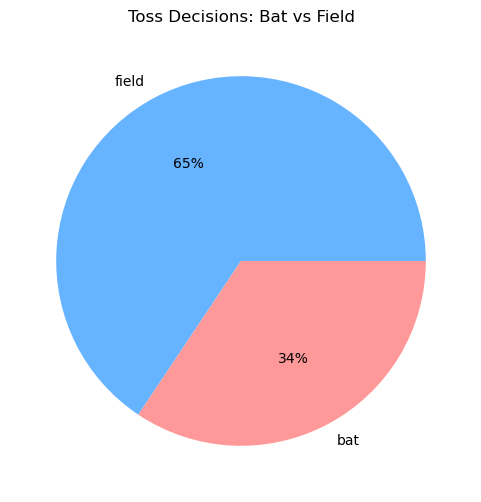

In [37]:
plt.figure(figsize=(6,6))
plt.pie(toss_counts.values, labels=toss_counts.index, autopct="%d%%", colors=["#66b3ff","#ff9999"])
plt.title("Toss Decisions: Bat vs Field")
plt.show()

- Most captains chose to field after winning the toss

## Number of wins by team

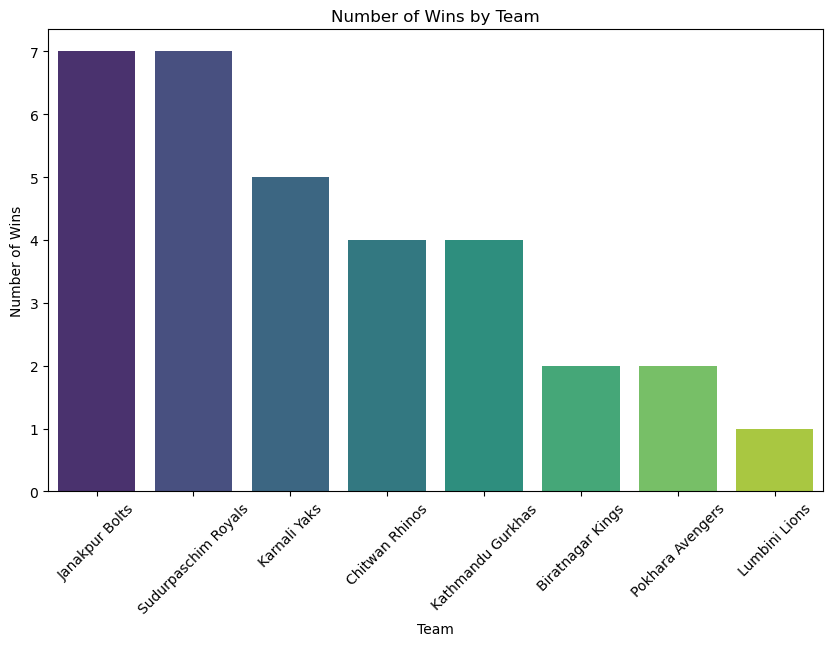

winner
Janakpur Bolts         7
Sudurpaschim Royals    7
Karnali Yaks           5
Chitwan Rhinos         4
Kathmandu Gurkhas      4
Biratnagar Kings       2
Pokhara Avengers       2
Lumbini Lions          1
Name: count, dtype: int64


In [38]:
win_counts = npl_df['winner'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=win_counts.index, y=win_counts.values, palette='viridis')
plt.title("Number of Wins by Team")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.show()

print(win_counts)

- Janakpur Bolts and Sudurpaschim Royals dominated with 7 wins each

## Toss Winner vs Match Winner

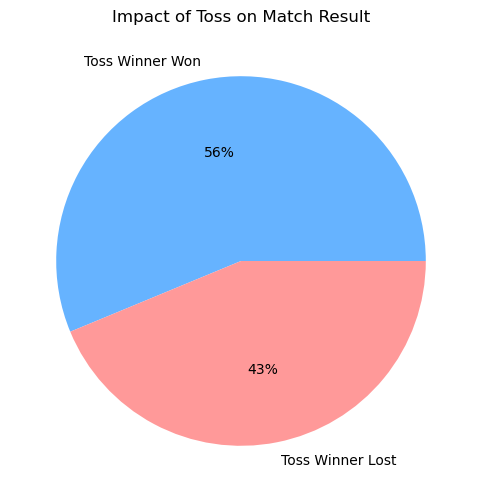

In [39]:
npl_df['toss_win_match_win'] =npl_df['toss_winner'] == npl_df['winner']
toss_impact = npl_df['toss_win_match_win'].value_counts()
toss_impact

plt.figure(figsize=(6,6))
plt.pie(toss_impact.values, labels=["Toss Winner Won","Toss Winner Lost"], autopct="%d%%", colors=["#66b3ff","#ff9999"])
plt.title("Impact of Toss on Match Result")
plt.show()

## Average runs scored by each team

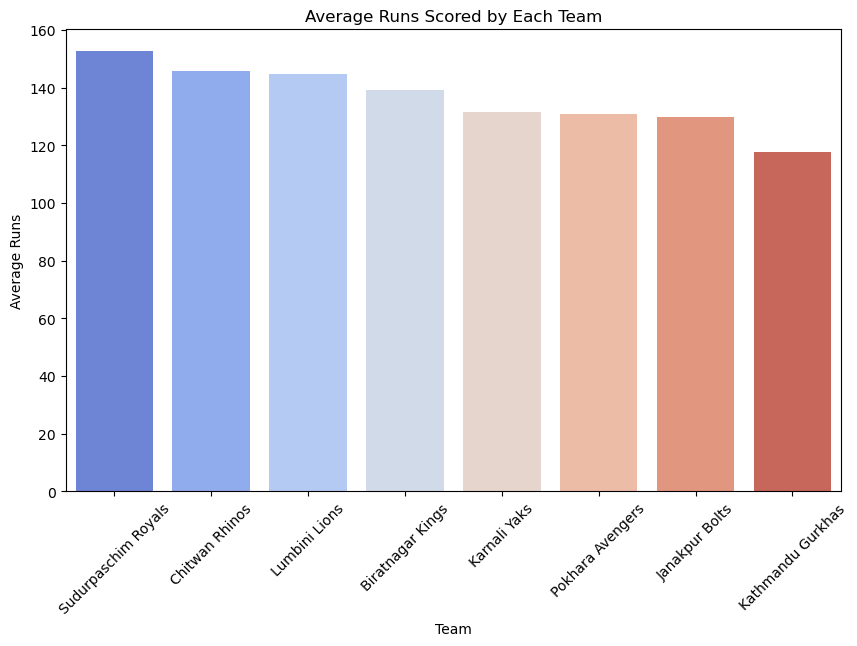

team
Sudurpaschim Royals    152.555556
Chitwan Rhinos         145.875000
Lumbini Lions          144.714286
Biratnagar Kings       139.285714
Karnali Yaks           131.444444
Pokhara Avengers       130.857143
Janakpur Bolts         129.900000
Kathmandu Gurkhas      117.714286
Name: runs, dtype: float64


In [40]:
team1_data = npl_df[['team_1', 'team_1_runs']].rename(columns={'team_1':'team', 'team_1_runs':'runs'})
team2_data = npl_df[['team_2', 'team_2_runs']].rename(columns={'team_2':'team', 'team_2_runs':'runs'})

all_teams = pd.concat([team1_data, team2_data])
#print(all_teams)

# Calculating averarge runs
average_runs = all_teams.groupby('team')['runs'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=average_runs.index, y=average_runs.values, palette="coolwarm")
plt.title('Average Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.show()

print(average_runs)

## Wins by run vs wicket

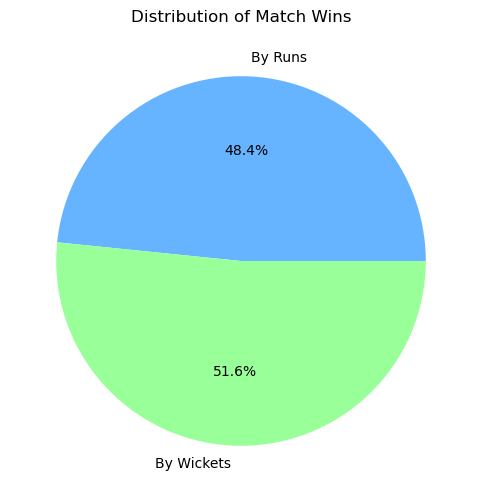

Matches won by runs: 15
Matches won by wickets: 16


In [41]:
runs_wins = (npl_df['win_by_runs'] > 0).sum()
wickets_wins = (npl_df['win_by_wickets'] > 0).sum()

plt.figure(figsize=(6,6))
plt.pie([runs_wins, wickets_wins], labels=["By Runs", "By Wickets"], autopct="%1.1f%%", colors=["#66b3ff","#99ff99"])
plt.title("Distribution of Match Wins")
plt.show()

print(f"Matches won by runs: {runs_wins}")
print(f"Matches won by wickets: {wickets_wins}")

- 16 matches were won by wickets (chasing) and 15 matches by runs (defending)

## Player of the match awards

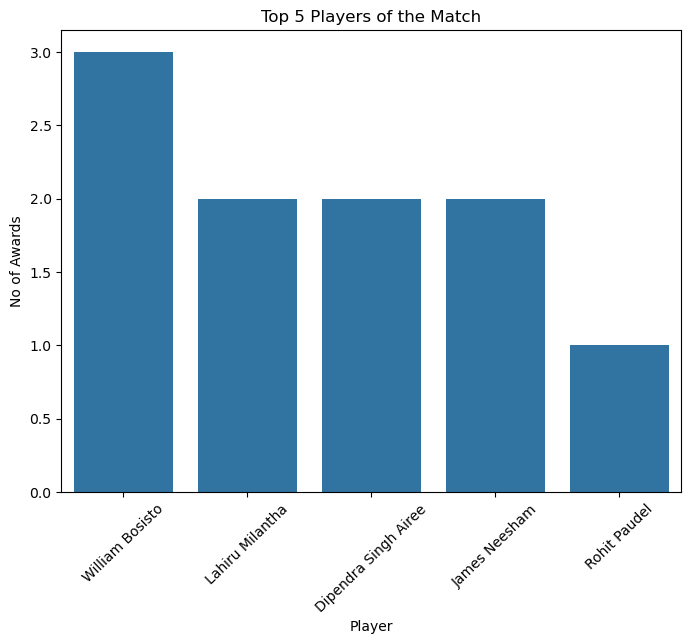

Top 5 match winning playerers:
 player_of_the_match
William Bosisto         3
Lahiru Milantha         2
Dipendra Singh Airee    2
James Neesham           2
Rohit Paudel            1
Name: count, dtype: int64


In [42]:
top_players = npl_df['player_of_the_match'].value_counts()
top_five = top_players.head()

plt.figure(figsize=(8,6))
sns.barplot(x=top_five.index, y=top_five.values)
plt.title("Top 5 Players of the Match")
plt.xlabel("Player")
plt.xticks(rotation=44)
plt.ylabel("No of Awards")
plt.show()

print("Top 5 match winning playerers:\n", top_five)


- William Bosisto led with 3 Player of the Match awards, followed by Milantha, Airee, and Neesham with 2 each.

## Matches won by DLS

In [43]:
dls_matches = npl_df[npl_df['dls_applied'] == 1]
print(dls_matches[['date', 'team_1', 'team_2', 'winner']])

Empty DataFrame
Columns: [date, team_1, team_2, winner]
Index: []


- There were no matches affected by DLS

# Ball Data

In [44]:
npl_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          7485 non-null   int64  
 1   inning            7485 non-null   int64  
 2   batting_team      7485 non-null   object 
 3   bowling_team      7485 non-null   object 
 4   ball_over         7485 non-null   float64
 5   ball_result       7485 non-null   object 
 6   bowler            7485 non-null   object 
 7   batsman           7485 non-null   object 
 8   non_striker       7485 non-null   object 
 9   shot_direction    5612 non-null   object 
 10  player_dismissed  455 non-null    object 
 11  dismissal_kind    455 non-null    object 
 12  fielder           288 non-null    object 
 13  batsman_runs      7485 non-null   int64  
 14  wide_runs         7485 non-null   int64  
 15  bye_runs          7485 non-null   int64  
 16  legbye_runs       7485 non-null   int64  


In [45]:
npl_final.head()

,match_id,inning,batting_team,bowling_team,ball_over,ball_result,bowler,batsman,non_striker,shot_direction,player_dismissed,dismissal_kind,fielder,batsman_runs,wide_runs,bye_runs,legbye_runs,noball_runs,extra_runs,total_runs
0,1,1,Biratnagar Kings,Janakpur Bolts,0.1,0,Kishore Mahato,Lokesh Bam,Martin Guptill,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,1,1,Biratnagar Kings,Janakpur Bolts,0.2,4,Kishore Mahato,Lokesh Bam,Martin Guptill,third man,NaN,NaN,NaN,4,0,0,0,0,0,4
2,1,1,Biratnagar Kings,Janakpur Bolts,0.3,0,Kishore Mahato,Lokesh Bam,Martin Guptill,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
3,1,1,Biratnagar Kings,Janakpur Bolts,0.4,1w,Kishore Mahato,Lokesh Bam,Martin Guptill,NaN,NaN,NaN,NaN,0,1,0,0,0,1,1
4,1,1,Biratnagar Kings,Janakpur Bolts,0.4,0,Kishore Mahato,Lokesh Bam,Martin Guptill,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0


In [46]:
npl_final['batting_team'].unique()

array(['Biratnagar Kings', 'Janakpur Bolts', 'Kathmandu Gurkhas',
       'Chitwan Rhinos', 'Karnali Yaks', 'Sudurpaschim Royals',
       'Pokhara Avengers', 'Lumbini Lions'], dtype=object)

## Total runs by team

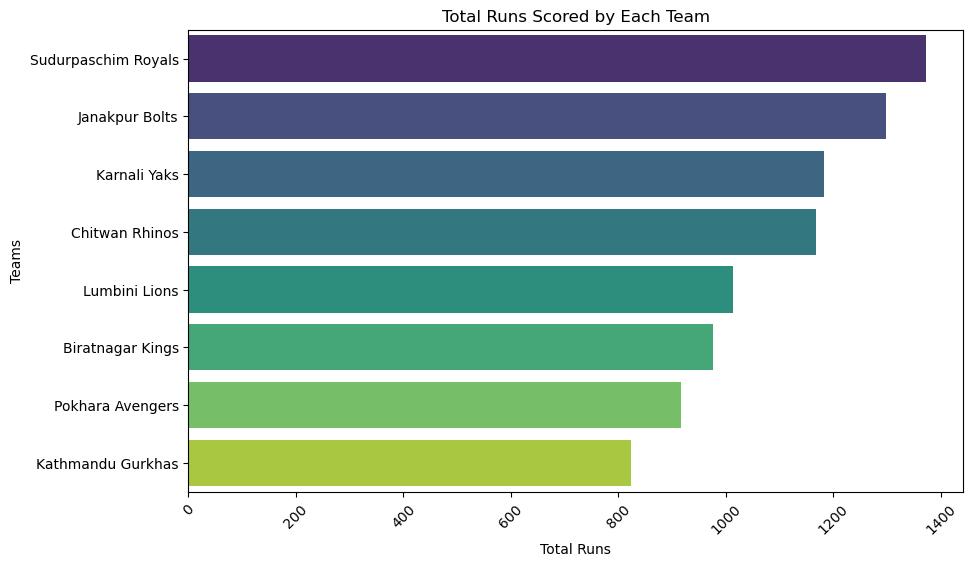

batting_team
Sudurpaschim Royals    1373
Janakpur Bolts         1298
Karnali Yaks           1183
Chitwan Rhinos         1167
Lumbini Lions          1013
Biratnagar Kings        975
Pokhara Avengers        916
Kathmandu Gurkhas       824
Name: total_runs, dtype: int64

In [47]:
team_runs = npl_final.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=team_runs.values, y=team_runs.index, palette="viridis")
plt.title("Total Runs Scored by Each Team")
plt.xlabel("Total Runs")
plt.ylabel("Teams")
plt.xticks(rotation=45)
plt.show()
team_runs

- Sudurpaschim Royals scored the most runs in NPL S1 (1373), while Kathmandu Gurkhas scored the least (824).

## Average Runs per Inning

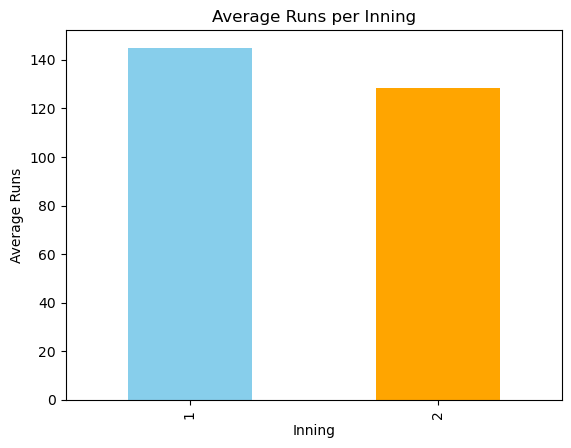

inning
1    144.90625
2    128.50000
Name: total_runs, dtype: float64

In [48]:
inning_runs = npl_final.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()
avg_runs_per_inning = inning_runs.groupby('inning')['total_runs'].mean()

avg_runs_per_inning.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Average Runs per Inning")
plt.xlabel("Inning")
plt.ylabel("Average Runs")
plt.show()

(avg_runs_per_inning)

- In the first innings, an average of 144 runs were scored, while the second innings saw an average of 128 runs.

## Top Batsmen

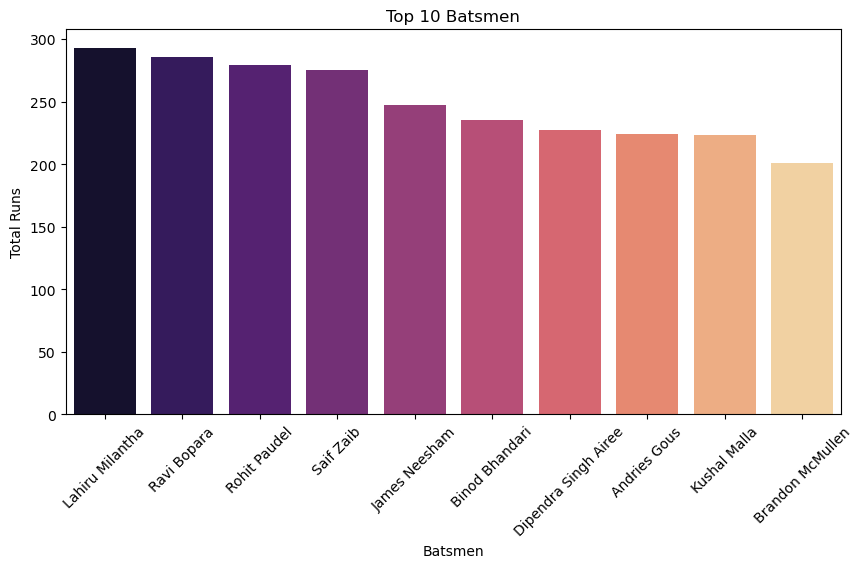

batsman
Lahiru Milantha         293
Ravi Bopara             286
Rohit Paudel            279
Saif Zaib               275
James Neesham           247
Binod Bhandari          235
Dipendra Singh Airee    227
Andries Gous            224
Kushal Malla            223
Brandon McMullen        201
Name: batsman_runs, dtype: int64


In [49]:
top_batsmen = npl_final.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
top_10 = top_batsmen.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_10.index, y=top_10.values, palette="magma")
plt.title("Top 10 Batsmen")
plt.xlabel("Batsmen")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.show()

print(top_10)

- Lahiru Milantha topped the chart with 293 runs, followed closely by Ravi Bopara (286) and Rohit Paudel (279), with the rest of the top 10 contributing between 201–275 runs.

## Top Bowlers with most Wickets

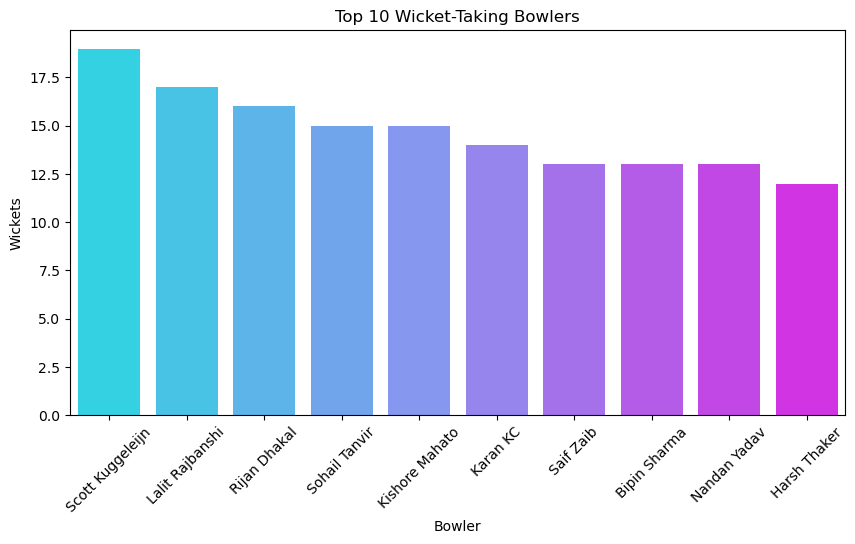

bowler
Scott Kuggeleijn    19
Lalit Rajbanshi     17
Rijan Dhakal        16
Sohail Tanvir       15
Kishore Mahato      15
Karan KC            14
Saif Zaib           13
Bipin Sharma        13
Nandan Yadav        13
Harsh Thaker        12
Name: player_dismissed, dtype: int64


In [50]:
dismissed_players = npl_final[npl_final['player_dismissed'].notnull()]
top10_bowlers = (dismissed_players.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10))

plt.figure(figsize=(10,5))
sns.barplot(x=top10_bowlers.index, y=top10_bowlers.values, palette="cool")
plt.title("Top 10 Wicket-Taking Bowlers")
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.xticks(rotation=45)
plt.show()

print(top10_bowlers)

- Scott Kuggeleijn led the wickets chart with 19 wickets, followed by Lalit Rajbanshi (17) and Rijan Dhakal (16), while the rest of the top 10 took between 12–15 wickets.

## Batsman with most 6

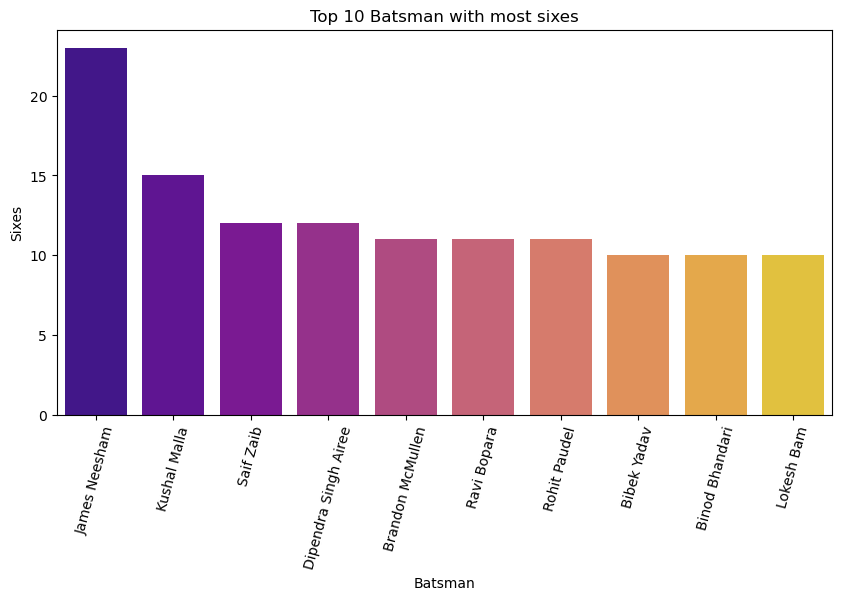

Top 10 batsmen with most sixes:
 batsman
James Neesham           23
Kushal Malla            15
Saif Zaib               12
Dipendra Singh Airee    12
Brandon McMullen        11
Ravi Bopara             11
Rohit Paudel            11
Bibek Yadav             10
Binod Bhandari          10
Lokesh Bam              10
Name: batsman_runs, dtype: int64


In [51]:
sixes = npl_final[npl_final['batsman_runs'] == 6]
most_sixes = sixes.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=most_sixes.index, y=most_sixes.values, palette="plasma")
plt.title("Top 10 Batsman with most sixes")
plt.xlabel("Batsman")
plt.ylabel("Sixes")
plt.xticks(rotation=75)
plt.show()

print("Top 10 batsmen with most sixes:\n", most_sixes)

- James Neesham hit 23 sixes, the highest.

## Batsman with most 4

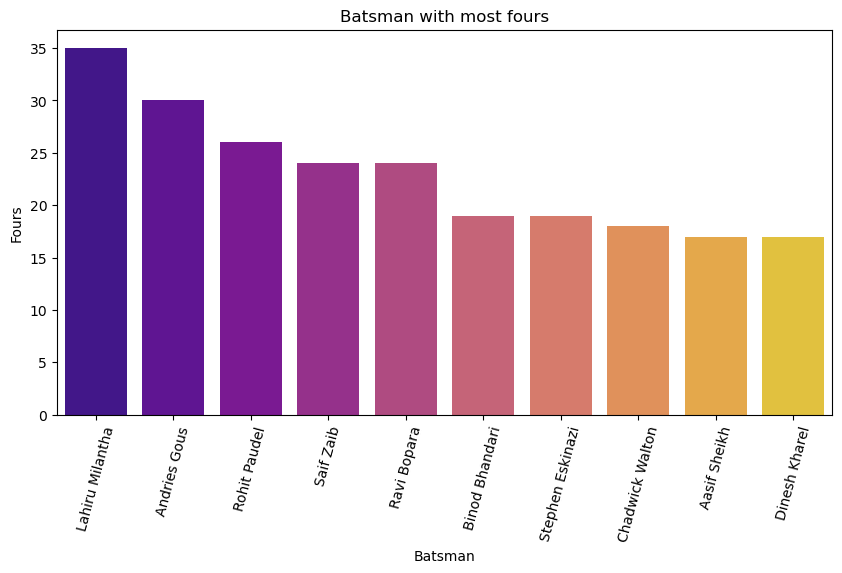

Top 10 batsmen with most sixes:
 batsman
Lahiru Milantha     35
Andries Gous        30
Rohit Paudel        26
Saif Zaib           24
Ravi Bopara         24
Binod Bhandari      19
Stephen Eskinazi    19
Chadwick Walton     18
Aasif Sheikh        17
Dinesh Kharel       17
Name: batsman_runs, dtype: int64


In [52]:
fours = npl_final[npl_final['batsman_runs'] == 4]
most_fours = fours.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=most_fours.index, y=most_fours.values, palette="plasma")
plt.title("Batsman with most fours")
plt.xlabel("Batsman")
plt.ylabel("Fours")
plt.xticks(rotation=75)
plt.show()

print("Top 10 batsmen with most sixes:\n", most_fours)

- Lahiru Milantha hit 35 fours, the highest.

## Top partnership

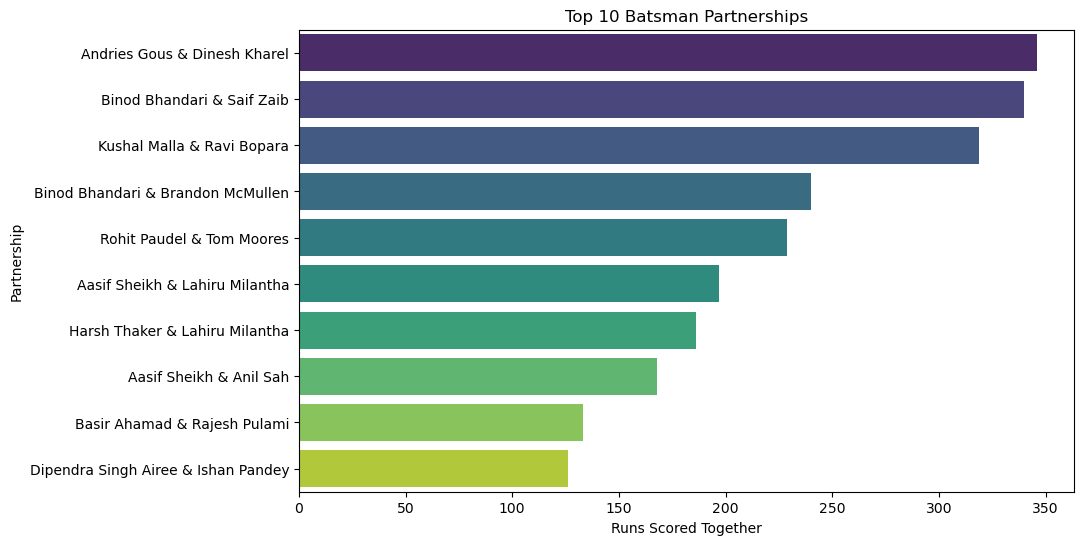

Top 10 Partnerships:
               Batsman_1         Batsman_2  Runs
0          Andries Gous     Dinesh Kharel   346
1        Binod Bhandari         Saif Zaib   340
2          Kushal Malla       Ravi Bopara   319
3        Binod Bhandari  Brandon McMullen   240
4          Rohit Paudel        Tom Moores   229
5          Aasif Sheikh   Lahiru Milantha   197
6          Harsh Thaker   Lahiru Milantha   186
7          Aasif Sheikh          Anil Sah   168
8          Basir Ahamad     Rajesh Pulami   133
9  Dipendra Singh Airee      Ishan Pandey   126


In [53]:
npl_final['partnership'] = npl_final['batsman_runs'] + npl_final['extra_runs']
partnerships = (
    npl_final.groupby([npl_final[['batsman','non_striker']].min(axis=1), 
                npl_final[['batsman','non_striker']].max(axis=1)])['partnership']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_partnerships = partnerships.reset_index()
top_partnerships.columns = ['Batsman_1','Batsman_2','Runs']

plt.figure(figsize=(10,6))
sns.barplot(
    x="Runs", 
    y=top_partnerships["Batsman_1"] + " & " + top_partnerships["Batsman_2"], 
    data=top_partnerships, 
    palette="viridis"
)
plt.title("Top 10 Batsman Partnerships")
plt.xlabel("Runs Scored Together")
plt.ylabel("Partnership")
plt.show()

print("Top 10 Partnerships:\n", top_partnerships)

- Andries Gous and Dinesh Kharel formed the highest-scoring partnership with 346 runs, followed closely by Binod Bhandari & Saif Zaib (340) and Kushal Malla & Ravi Bopara (319), with the rest of the top 10 partnerships contributing between 126–240 runs.

## Shots Direction Distribution

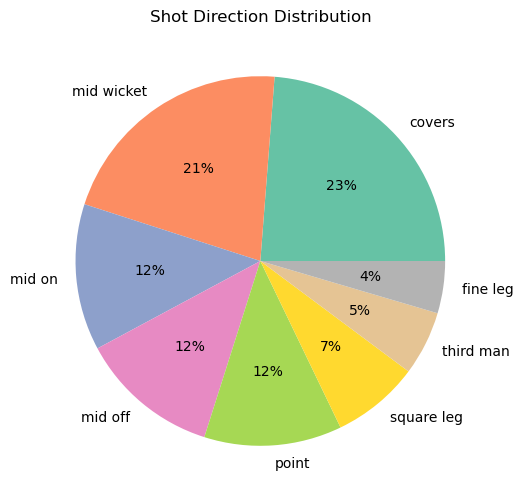

In [54]:
shot_counts = npl_final['shot_direction'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(shot_counts.values, labels=shot_counts.index, 
        autopct="%d%%", 
        colors=sns.color_palette("Set2", len(shot_counts)))
plt.title("Shot Direction Distribution")
plt.show()


## Batsman with most dot balls

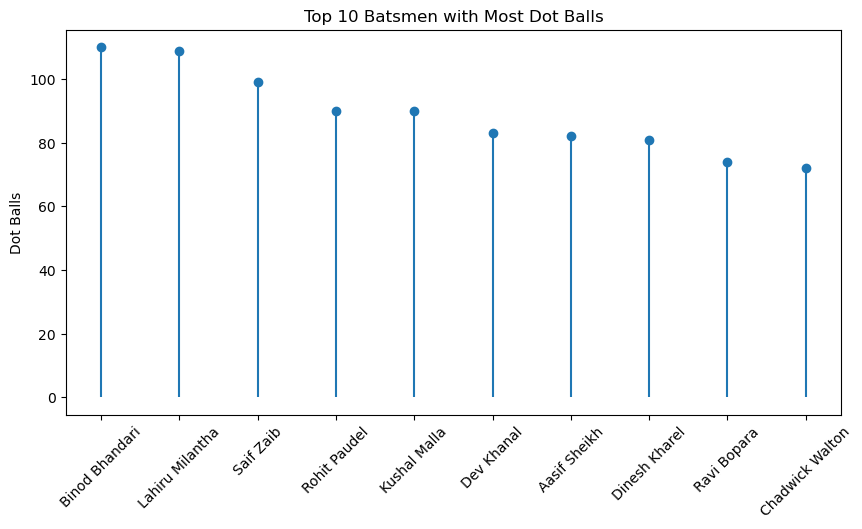

Top 10 batsmen with most dot balls:
 batsman
Binod Bhandari     110
Lahiru Milantha    109
Saif Zaib           99
Rohit Paudel        90
Kushal Malla        90
Dev Khanal          83
Aasif Sheikh        82
Dinesh Kharel       81
Ravi Bopara         74
Chadwick Walton     72
Name: batsman_runs, dtype: int64


In [55]:
dots = npl_final[npl_final['batsman_runs']==0]
most_dots = dots.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.stem(most_dots.index, most_dots.values, basefmt=" ")
plt.title("Top 10 Batsmen with Most Dot Balls")
plt.ylabel("Dot Balls")
plt.xticks(rotation=45)
plt.show()

print("Top 10 batsmen with most dot balls:\n", most_dots)

- Binod Bhandari faced the most dot balls with 110, Lahiru Milantha 109, and Saif Zaib 99, while the other top batsmen faced 72–90 dot balls.

## Extra Runs

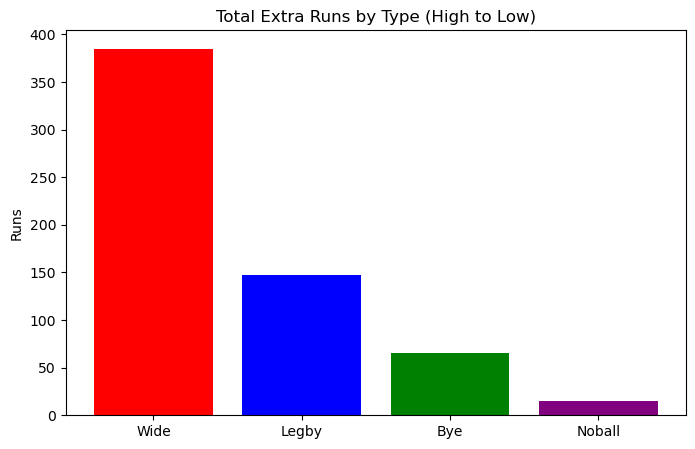

wide_runs      385
legbye_runs    147
bye_runs        65
noball_runs     15
dtype: int64


In [56]:
extras = npl_final[['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs']].sum()
extras_sorted = extras.sort_values(ascending=False)

labels = extras_sorted.index.map({'wide_runs':'Wide', 'bye_runs':'Bye', 'legbye_runs':'Legby', 'noball_runs':'Noball'})
plt.figure(figsize=(8,5))
plt.bar(labels, extras_sorted.values, color=['red','blue','green','purple'])
plt.title("Total Extra Runs by Type (High to Low)")
plt.ylabel("Runs")
plt.show()

print(extras_sorted)

- Most extra runs came from wides (385), followed by legby (147), bye (65), and very few from no-balls (15), showing wides were the biggest source of extras.